In [1]:
#Ejemplo de pronóstico
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Generar datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*2 + np.random.randn(len(dates))*50
ts = pd.Series(values, index=dates)

In [3]:
#Dividir los datos de entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

In [4]:
#Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10,1,10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
#Realizar el pronóstico
forescast = model_fit.forecast(steps=len(test_data))

In [6]:
#Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_data, forescast)
print('Error absoluto medio (MAE):', mae)

Error absoluto medio (MAE): 41.891692129654714


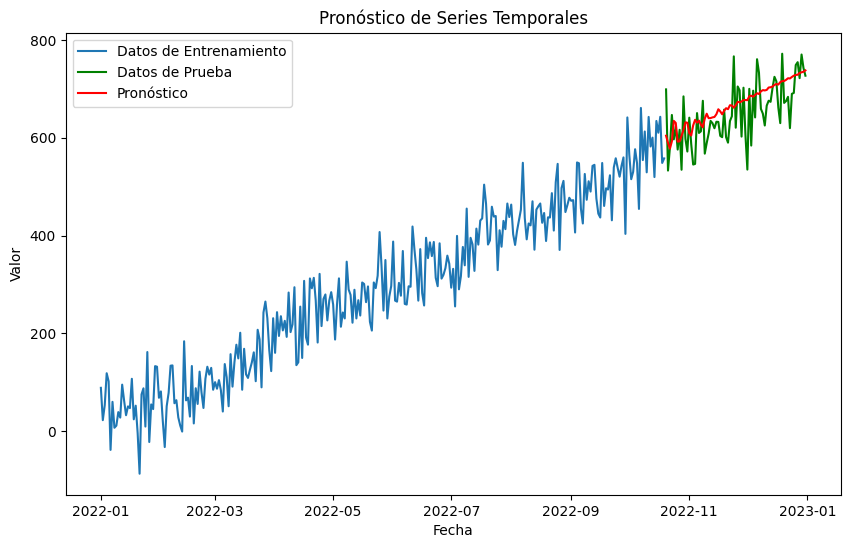

In [7]:
#Gráfica de los datos originales y el pronóstico
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green')
plt.plot(test_data.index, forescast, label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()